In [156]:
import pandas as pd
import numpy as np

In [157]:
data = {'Output,Q':[80,150,135,165,95,130,110],
       'Labour,L':[60,100,100,120,70,90,80],
       'Capital,K':[50,100,80,100,60,80,70]}
df = pd.DataFrame(data, index = ['B','C','D','E','F','G','H'])

In [158]:
print(df)

   Output,Q  Labour,L  Capital,K
B        80        60         50
C       150       100        100
D       135       100         80
E       165       120        100
F        95        70         60
G       130        90         80
H       110        80         70


In [159]:
df.mean()

Output,Q     123.571429
Labour,L      88.571429
Capital,K     77.142857
dtype: float64

In [160]:
df.var()

Output,Q     914.285714
Labour,L     414.285714
Capital,K    357.142857
dtype: float64

In [161]:
df.std()

Output,Q     30.237158
Labour,L     20.354010
Capital,K    18.898224
dtype: float64

In [162]:
df.median()

Output,Q     130.0
Labour,L      90.0
Capital,K     80.0
dtype: float64

Text(0, 0.5, 'density')

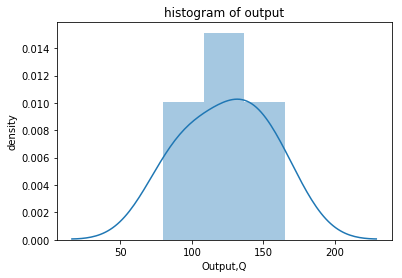

In [163]:
import seaborn as sns
x1=df['Output,Q']
x2=df['Labour,L']

ax1=sns.distplot(x1)
ax1.set_title('histogram of output')
ax1.set_ylabel('density')

Text(0, 0.5, 'density')

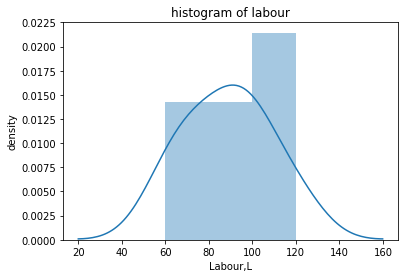

In [164]:
ax2=sns.distplot(x2)
ax2.set_title('histogram of labour')
ax2.set_ylabel('density')

In [165]:
log_df=np.log(df)

In [166]:
print(log_df)

   Output,Q  Labour,L  Capital,K
B  4.382027  4.094345   3.912023
C  5.010635  4.605170   4.605170
D  4.905275  4.605170   4.382027
E  5.105945  4.787492   4.605170
F  4.553877  4.248495   4.094345
G  4.867534  4.499810   4.382027
H  4.700480  4.382027   4.248495


In [167]:
x = log_df[['Labour,L','Capital,K']]
y = log_df['Output,Q']

In [168]:
import statsmodels.api as sm

In [176]:
 xx = sm.add_constant(x)
model1 = sm.OLS(y, xx).fit()

In [178]:
model1.summary()

/Users/peter1/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Output,Q   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Thu, 16 May 2019   Prob (F-statistic):           4.34e-06
Time:                        22:22:57   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1462      0.114      1.282      0.269      -0.170       0.463
Labour,L       0.5484      0.090      6.127      0.004       0.300       0.797
Capital,K      0.5087      0.083      6.150      0.004       0.279       0.738
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.801
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.261
Skew:                           1.352   Prob(JB):                        0.323
Kurtosis:                       3.665   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
alpha = model1.params[1]
beta = model1.params[2]

In [172]:
 print('\u03b1+\u03b2 =', alpha+beta)

α+β = 1.0571684057723623


In [173]:
import matplotlib.pyplot as plt 
residual = y-model1.predict(xx)
index = ['B','C','D','E','F','G','H']

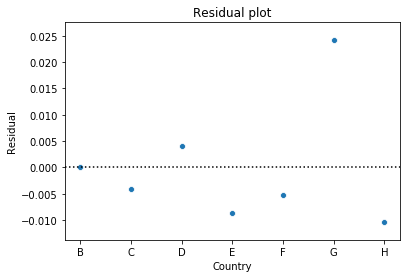

In [174]:
ax = sns.scatterplot(x=index, y=residual)
ax.set_title('Residual plot')
ax.set_ylabel('Residual')
ax.set_xlabel('Country')
plt.axhline(0, color='black', ls='dotted')

In [179]:
 print('The adjusted R\u00b2 of the model is:', model1.rsquared_adj)

The adjusted R² of the model is: 0.9968763418198051
